# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [41]:
filename = os.path.join(os.getcwd(), "data", "adultData.csv")
df = pd.read_csv(filename, header=0)

In [42]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K
5,37.0,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40.0,United-States,<=50K
6,49.0,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16.0,Jamaica,<=50K
7,52.0,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,45.0,United-States,>50K
8,31.0,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50.0,United-States,>50K
9,42.0,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,5178,0,40.0,United-States,>50K


## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [43]:
df.isnull().values.any()
df.isnull().sum()

age                162
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
dtype: int64

In [44]:
df.shape

(32561, 15)

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [45]:
# Create a list of columns to drop
cols_to_drop = ['marital-status', 'workclass', 'education', 'relationship', 'occupation', 'race', 'sex_selfID','native-country']

In [46]:
# Drop the columns from the df
df.drop(cols_to_drop, axis = 1, inplace=True)

In [47]:
# Show shape of df and verify columns have been dropped
df.shape
df.head(25)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income_binary
0,39.0,77516,13,2174,0,40.0,<=50K
1,50.0,83311,13,0,0,13.0,<=50K
2,38.0,215646,9,0,0,40.0,<=50K
3,53.0,234721,7,0,0,40.0,<=50K
4,28.0,338409,13,0,0,40.0,<=50K
5,37.0,284582,14,0,0,40.0,<=50K
6,49.0,160187,5,0,0,16.0,<=50K
7,52.0,209642,9,0,0,45.0,>50K
8,31.0,45781,14,14084,0,50.0,>50K
9,42.0,159449,13,5178,0,40.0,>50K


In [48]:
# Count number of missing values in each column and store in variable 
nan_count = np.sum(df.isnull(), axis = 0)
nan_count


age               162
fnlwgt              0
education-num       0
capital-gain        0
capital-loss        0
hours-per-week    325
income_binary       0
dtype: int64

In [49]:
# Focus on numerical columns with missing vriables and fill them with dummy variables 
df.dtypes


age               float64
fnlwgt              int64
education-num       int64
capital-gain        int64
capital-loss        int64
hours-per-week    float64
income_binary      object
dtype: object

In [50]:
# Fill missing values for age and hours-per-weak column 

# Explore columns with missing variables
df.loc[df['age'].isnull()]

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income_binary
50,NaN,32275,10,0,0,40.0,<=50K
298,NaN,278130,9,0,0,40.0,<=50K
433,NaN,29662,12,0,0,25.0,>50K
524,NaN,177905,10,0,0,58.0,>50K
852,NaN,177407,9,0,0,50.0,<=50K
...,...,...,...,...,...,...,...
31501,NaN,259301,9,0,0,40.0,<=50K
31617,NaN,119793,9,0,0,40.0,<=50K
31636,NaN,58484,13,0,0,40.0,<=50K
31913,NaN,90230,9,0,0,20.0,<=50K


In [51]:
# Compute mean for all non null age values
mean_age = df['age'].mean()
print("mean value for all age columns: " + str(mean_age))

# Fill all missing age values with the computed mean
df['age'].fillna(value=mean_age, inplace=True)


mean value for all age columns: 38.58921571653446


In [52]:
# Do the same for hours-per-week

# Compute mean for hours-per-week
mean_weeklyhours = df['hours-per-week'].mean()
print("mean value for all weekly hours columns: " + str(mean_weeklyhours))

# Fill missing hours-per-weak with computed mean
df['hours-per-week'].fillna(value=mean_weeklyhours, inplace=True)

mean value for all weekly hours columns: 40.450428092815486


In [53]:
# Check that all missing values in age and weekly hour column are filled
sum_age = np.sum(df['age'].isnull(), axis = 0)
print(sum_age)

sum_hours = np.sum(df['hours-per-week'].isnull(), axis = 0)
print(sum_hours)

0
0


In [54]:
df.head(20)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income_binary
0,39.0,77516,13,2174,0,40.000000,<=50K
1,50.0,83311,13,0,0,13.000000,<=50K
2,38.0,215646,9,0,0,40.000000,<=50K
3,53.0,234721,7,0,0,40.000000,<=50K
4,28.0,338409,13,0,0,40.000000,<=50K
5,37.0,284582,14,0,0,40.000000,<=50K
6,49.0,160187,5,0,0,16.000000,<=50K
7,52.0,209642,9,0,0,45.000000,>50K
8,31.0,45781,14,14084,0,50.000000,>50K
9,42.0,159449,13,5178,0,40.000000,>50K


In [55]:
# Build model; pick columns for our label and features

# select binary_income as our label and assign to variable y; all other columns will be our features, assign to X
y = df['income_binary']
X = df.drop(columns='income_binary', axis=1)

In [56]:
# Split into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

In [57]:
# Create the LogisticRegression model object below and assign to variable 'model'

model = LogisticRegression()

# Fit the model to the training data below
model.fit(X_train, y_train)

# Make predictions on the test data using the predict_proba(), save 
# result to the variable 'probability_pred' 
probability_pred = model.predict_proba(X_test)


# Make predictions on the test data, assign  result to the variable 'class_label_predictions' 
class_label_predictions = model.predict(X_test)


# Compute the accuracy score on 'class_label_predictions', save result to the variable 'accuracy_LR' 
accuracy_LR = accuracy_score(y_test, class_label_predictions)
print('Accuracy: ' + str(accuracy_LR))


# Compute precision for under 50k
precision_under_50K = precision_score(y_test, class_label_predictions, pos_label='<=50K')
print("Precision for <=50K:", precision_under_50K)

# Compute precision for over 
precision_above_50K = precision_score(y_test, class_label_predictions, pos_label='>50K')
print("Precision for >50K:", precision_above_50K)

# Compute ROC-AUC score
roc_auc_LR = roc_auc_score(y_test, probability_pred[:, 1])
print("ROC-AUC:", roc_auc_LR)



Accuracy: 0.8002047273404057
Precision for <=50K: 0.8100968893421724
Precision for >50K: 0.6971307120085016
ROC-AUC: 0.5762650868052405


In [58]:
# Create a KNN model

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

# Create a KNN model with k=5 
KNN_model = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
KNN_model.fit(X_train, y_train)

# Make predictions on the test data
prob_predictions = KNN_model.predict_proba(X_test)[:, 1]
label_pred = KNN_model.predict(X_test)

# Compute accuracy
accuracy_KNN = accuracy_score(y_test, label_pred)
print("Accuracy:", accuracy_KNN)

# Compute precision for under 50k
precision_under_50K = precision_score(y_test, label_pred, pos_label='<=50K')
print("Precision for <=50K:", precision_under_50K)

# Compute precision for over 50k
precision_above_50K = precision_score(y_test, label_pred, pos_label='>50K')
print("Precision for >50K:", precision_above_50K)

# Compute ROC-AUC score
roc_auc_KNN = roc_auc_score(y_test, prob_predictions)
print("ROC-AUC:", roc_auc_KNN)


Accuracy: 0.7747999255536944
Precision for <=50K: 0.8129984910541065
Precision for >50K: 0.5333787465940054
ROC-AUC: 0.6740696204633396


In [59]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

# Create a Decision Tree model
DT_model = DecisionTreeClassifier(random_state=1234)

# Fit the model to the training data
DT_model.fit(X_train, y_train)

# Make predictions on the test data
label_predictions = DT_model.predict(X_test)
# Probability for class '>50K'
predict_proba = DT_model.predict_proba(X_test)[:, 1]  

# Compute accuracy
accuracy_DT = accuracy_score(y_test, label_predictions)
print("Accuracy:", accuracy_DT)

# Compute precision for under 50k
precision_under_50K = precision_score(y_test, label_predictions, pos_label='<=50K')
print("Precision for <=50K:", precision_under_50K)

# Compute precision for over 50k
precision_above_50K = precision_score(y_test, label_predictions, pos_label='>50K')
print("Precision for >50K:", precision_above_50K)

# Compute ROC-AUC score
roc_auc_DT = roc_auc_score(y_test, predict_proba)
print("ROC-AUC:", roc_auc_DT)


Accuracy: 0.7674483528754885
Precision for <=50K: 0.852120467117394
Precision for >50K: 0.5036384527001149
ROC-AUC: 0.6826631191734533


In [60]:
# This Random forest with 75 estimators yielded lower accuracy and auc scores, increased estimators to 100 which yielded higher scores
# Split data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

# Create a Random Forest model with 175 trees
#RF_model = RandomForestClassifier(n_estimators=75, random_state=1234)

# Fit the model to the training data
#RF_model.fit(X_train, y_train)

# Make predictions on the test data
#y_pred = RF_model.predict(X_test)

# Compute accuracy score
#accuracy_RF = accuracy_score(y_test, y_pred)
#print("Accuracy:", accuracy_RF)

# Compute precision for under 50k
#precision_under_50K = precision_score(y_test, y_pred, pos_label='<=50K')
#print("Precision for <=50K:", precision_under_50K)

# Compute precision for over 50k
#precision_above_50K = precision_score(y_test, y_pred, pos_label='>50K')
#print("Precision for >50K:", precision_above_50K)

# Compute ROC-AUC score
# Probability for class '>50K'
#roc_auc_RF = roc_auc_score(y_test, RF_model.predict_proba(X_test)[:, 1])  
#print("ROC-AUC:", roc_auc_RF)

In [61]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

# Create a Random Forest model with 100 trees
RF_model = RandomForestClassifier(n_estimators=100, random_state=1234)

# Fit the model to the training data
RF_model.fit(X_train, y_train)

# Make predictions on the test data
label_pred = RF_model.predict(X_test)

# Compute accuracy score
accuracy_RF = accuracy_score(y_test, label_pred)
print("Accuracy:", accuracy_RF)

# Compute precision for under 50k
precision_under_50K = precision_score(y_test, label_pred, pos_label='<=50K')
print("Precision for <=50K:", precision_under_50K)

# Compute precision for over 50k
precision_above_50K = precision_score(y_test, label_pred, pos_label='>50K')
print("Precision for >50K:", precision_above_50K)

# Compute ROC-AUC score
# Probability for class '>50K'
roc_auc_RF = roc_auc_score(y_test, RF_model.predict_proba(X_test)[:, 1])  
print("ROC-AUC:", roc_auc_RF)

Accuracy: 0.8069048948445934
Precision for <=50K: 0.8550490478938257
Precision for >50K: 0.6064392119173474
ROC-AUC: 0.81960564538145


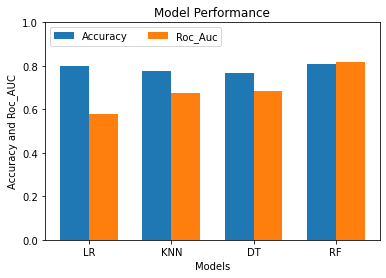

In [62]:
accuracy_scores = [accuracy_LR, accuracy_KNN, accuracy_DT, accuracy_RF]
roc_auc_scores = [roc_auc_LR, roc_auc_KNN, roc_auc_DT, roc_auc_RF]

rg= np.arange(4)
width = 0.35

# Create bar plot with accuracy score results
plt.bar(rg, accuracy_scores, width, label="Accuracy")

# Create bar plot with Roc_Auc score results
plt.bar(rg+width, roc_auc_scores, width, label='Roc_Auc')

# Call plt.xticks() to add labels under the bars i
labels = [ 'LR', 'KNN', 'DT', 'RF']
plt.xticks(rg + width/2, labels)

# Label the x and y axis of the plot
plt.xlabel("Models")
plt.ylabel("Accuracy and Roc_AUC")

plt.ylim([0,1])
plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()


In [63]:
# After utilizing 4 different models and comparing their performance, 
#I would use the Rnadom Forest model as it yielded the highest accuracy and auc-score.